In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import tensorflow as tf
import random
from random import randint
from random import shuffle
import librosa
import librosa.display
import pickle

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()
print("rdy")

rdy


In [3]:
ac_sets = ["0.7", "0.8", "0.9"]
ic_sets = ["0.7", "0.8", "0.9"]

def loadData_TwoModal(ac_per, ic_per,printSize=False):
    train_AC = pickle.load(open('data/AC_Training_'+ac_per+'.p', mode='rb'))
    valid_AC = pickle.load(open('data/AC_Validation_'+ac_per+'.p', mode='rb'))

    train_IC = pickle.load(open('data/IC_Training_'+ic_per+'.p', mode='rb'))
    valid_IC = pickle.load(open('data/IC_Validation_'+ic_per+'.p', mode='rb'))
    if(printSize):
        print("Validation samples",len(valid_AC[0]))
        print("Training samples",len(train_AC[0]))
    
    #Training Set
    trainHolder = []
    for i in range(len(train_AC[0])):
        trainHolder.append([train_AC[0][i],train_IC[0][i],train_AC[1][i]])
    #Validation set
    validHolder = []    
    for i in range(len(valid_AC[0])):
        validHolder.append([valid_AC[0][i],valid_IC[0][i],valid_AC[1][i]])
    
    return trainHolder, validHolder
        
trainingSet, validationSet = loadData_TwoModal("0.9","0.8")

In [14]:
# Print info on all classifiers
print("Number of samples in training set:",len(trainingSet))
print("Number of samples in validation set:",len(validationSet))
for acc_level in ac_sets:
    trainingSet, validationSet = loadData_TwoModal(acc_level,acc_level)
    print("Level of accuracy:",acc_level)
    t_ac = 0
    t_ic = 0

    for i in range(len(trainingSet)):
        if(np.argmax(trainingSet[i][0]) == np.argmax(trainingSet[i][2])):
            t_ac += 1
        if(np.argmax(trainingSet[i][1]) == np.argmax(trainingSet[i][2])):
            t_ic += 1

    print("Training accuracy for")
    print("AC is {:.2f}%".format (t_ac/len(trainingSet)*100))       
    print("IC is {:.2f}%".format (t_ic/len(trainingSet)*100))      

    v_ac = 0
    v_ic = 0

    for i in range(len(validationSet)):
        if(np.argmax(validationSet[i][0]) == np.argmax(validationSet[i][2])):
            v_ac += 1
        if(np.argmax(validationSet[i][1]) == np.argmax(validationSet[i][2])):
            v_ic += 1
    

    print("Validation accuracy for")
    print("AC is {:.2f}%".format (v_ac/len(validationSet)*100))
    print("IC is {:.2f}%".format (v_ic/len(validationSet)*100))  
    print()

Number of samples in training set: 20116
Number of samples in validation set: 3549
Level of accuracy: 0.7
Training accuracy for
AC is 73.17%
IC is 71.25%
Validation accuracy for
AC is 70.95%
IC is 71.26%

Level of accuracy: 0.8
Training accuracy for
AC is 83.68%
IC is 81.26%
Validation accuracy for
AC is 81.40%
IC is 81.09%

Level of accuracy: 0.9
Training accuracy for
AC is 94.58%
IC is 91.37%
Validation accuracy for
AC is 89.41%
IC is 90.05%



In [4]:

# Check the agreement factor between components
for ac in ac_sets:
    for ic in ic_sets:
        trainingSet, validationSet = loadData_TwoModal(ac,ic)
        train_agreement_ac_ic = 0

        for i in range(len(trainingSet)):
            if(np.argmax(trainingSet[i][0]) == np.argmax(trainingSet[i][1])):
                train_agreement_ac_ic += 1


        print("Training set agreement of AC/IC",ac,ic,": %.4f" % (train_agreement_ac_ic/len(trainingSet))) 

        valid_agreement_ac_ic = 0

        for i in range(len(validationSet)):
            if(np.argmax(validationSet[i][0]) == np.argmax(validationSet[i][1])):
                valid_agreement_ac_ic += 1

        print("Validation set agreement of AC/IC",ac,ic,": %.4f" % (valid_agreement_ac_ic/len(validationSet))) 
        print()

### TODO: Check this, something wrong here


Training set agreement of AC/IC 0.7 0.7 : 0.5142
Validation set agreement of AC/IC 0.7 0.7 : 0.5052

Training set agreement of AC/IC 0.7 0.8 : 0.5795
Validation set agreement of AC/IC 0.7 0.8 : 0.5680

Training set agreement of AC/IC 0.7 0.9 : 0.6804
Validation set agreement of AC/IC 0.7 0.9 : 0.6500

Training set agreement of AC/IC 0.8 0.7 : 0.6056
Validation set agreement of AC/IC 0.8 0.7 : 0.5940

Training set agreement of AC/IC 0.8 0.8 : 0.6761
Validation set agreement of AC/IC 0.8 0.8 : 0.6624

Training set agreement of AC/IC 0.8 0.9 : 0.7804
Validation set agreement of AC/IC 0.8 0.9 : 0.7447

Training set agreement of AC/IC 0.9 0.7 : 0.6739
Validation set agreement of AC/IC 0.9 0.7 : 0.6475

Training set agreement of AC/IC 0.9 0.8 : 0.7552
Validation set agreement of AC/IC 0.9 0.8 : 0.7202

Training set agreement of AC/IC 0.9 0.9 : 0.8803
Validation set agreement of AC/IC 0.9 0.9 : 0.8166



In [5]:
# Display the percentage of correcly classified samples by either AC or IC

for acc_level_a in ac_sets:
    for acc_level_b in ic_sets:
        
        # Set to false to print out in table for excel format
        displayNotebook = True

        # AC / IC AND AC/TC
        trainingSet, validationSet = loadData_TwoModal(acc_level_a,acc_level_b)

        trainKnowledge = 0
        validKnowledge = 0

        for i in range(len(trainingSet)):
            if(np.argmax(trainingSet[i][0]) == np.argmax(trainingSet[i][2])
              or
              np.argmax(trainingSet[i][1]) == np.argmax(trainingSet[i][2])
              ):
                trainKnowledge += 1


        for i in range(len(validationSet)):
            if(np.argmax(validationSet[i][0]) == np.argmax(validationSet[i][2])
               or
               np.argmax(validationSet[i][1]) == np.argmax(validationSet[i][2])
              ):
                    validKnowledge += 1

        if(displayNotebook):
            print("Validation % AC/IC at",acc_level_a,"/",acc_level_b,"is : {:.2f}".format (validKnowledge/len(validationSet)*100)) 
        else:
            a=("{:.2f}".format (train_agreement_ac_ic/len(trainingSet)*100)) 
            b=(" {:.2f}".format (valid_agreement_ic_tc/len(validationSet)*100)) 
            print(a+b)



Validation % AC/IC at 0.7 / 0.7 is : 92.53
Validation % AC/IC at 0.7 / 0.8 is : 94.70
Validation % AC/IC at 0.7 / 0.9 is : 97.44
Validation % AC/IC at 0.8 / 0.7 is : 94.20
Validation % AC/IC at 0.8 / 0.8 is : 95.52
Validation % AC/IC at 0.8 / 0.9 is : 98.28
Validation % AC/IC at 0.9 / 0.7 is : 96.62
Validation % AC/IC at 0.9 / 0.8 is : 97.63
Validation % AC/IC at 0.9 / 0.9 is : 99.07


In [6]:
### RUN ALL EXPERIMENTS WITH GATING NETWORK on highest accuracy
ac = "0.9"
ic = "0.9"
# Measure recall score for GN_10 and GN_50
from sklearn.metrics import precision_recall_fscore_support as score

trainingSet, validationSet = loadData_TwoModal(ac,ic)
print("Start Training of AC IC",ac,ic)

weightSize_check = [10,50] # 50
for w in weightSize_check:
    reset_graph()

    pkeep = tf.placeholder(tf.float32, shape=[])
    weightSize = w
    # 10 features
    x1 = [row[0] for row in trainingSet] 
    x2 = [row[1] for row in trainingSet] 
    y =  [row[2] for row in trainingSet] 

    x1_test = [row[0] for row in validationSet] 
    x2_test = [row[1] for row in validationSet] 
    y_test =  [row[2] for row in validationSet] 

    x1_input = tf.placeholder(tf.float32, [None, 10])
    x2_input = tf.placeholder(tf.float32, [None, 10])
    y_label = tf.placeholder(tf.float32, [None, 10])

    # Other method according to paper
    o_Wv = tf.Variable(tf.random_uniform([ 10, weightSize],  minval=-0.2,maxval=0.2))
    o_Wt = tf.Variable(tf.random_uniform([ 10, weightSize],  minval=-0.2,maxval=0.2))
    o_Wz = tf.Variable(tf.random_uniform([ 20, weightSize],  minval=-0.2,maxval=0.2))

    o_hv = tf.nn.tanh(tf.matmul(x1_input, o_Wv))
    o_ht = tf.nn.tanh(tf.matmul(x2_input, o_Wt))

    ddd = tf.concat((x1_input,x2_input), axis=1)
    o_z = tf.nn.relu(tf.matmul(ddd, o_Wz))

    if(weightSize == 10):
        o_h = tf.nn.softmax(tf.multiply(o_z, o_hv) + tf.multiply((1-o_z), o_ht))
    else:
        o_h_temp = tf.multiply(o_z, o_hv) + tf.multiply((1-o_z), o_ht)
        W1  = tf.Variable(tf.random_uniform([50, 128],  minval=-0.2,maxval=0.2))
        B1 =  tf.Variable(tf.random_normal([128], mean=0.1,stddev=.1))
        W2  = tf.Variable(tf.random_uniform([128, 64],  minval=-0.2,maxval=0.2))
        B2 =  tf.Variable(tf.random_normal([64], mean=0.1,stddev=.1))
        W3  = tf.Variable(tf.random_uniform([64, 10],  minval=-0.2,maxval=0.2))
        B3 =  tf.Variable(tf.random_normal([10], mean=0.1,stddev=.1))

        L1 =  tf.nn.relu(tf.add(tf.matmul(o_h_temp, W1), B1))
        L1_hat_dropout = tf.nn.dropout(L1,pkeep)

        L2 =  tf.nn.relu(tf.add(tf.matmul(L1_hat_dropout, W2), B2))
        L2_hat_dropout = tf.nn.dropout(L2,pkeep)

        o_h =  tf.nn.softmax(tf.add(tf.matmul(L2_hat_dropout, W3), B3))

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=o_h, labels=y_label)
    cross_entropy = tf.reduce_mean(cross_entropy) * 100

    optimizer = tf.train.AdamOptimizer()
    train_step = optimizer.minimize(cross_entropy)

    correct_pred = tf.equal(tf.argmax(o_h, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

    init = tf.global_variables_initializer()

    epochs = 1000

    t_acc = []
    v_acc = []

    gn_t_pred = []
    gn_v_pred = []

    with tf.Session() as sess:
        sess.run(init)
        maxEpoch, maxValid = 0,0

        for epoch in range(epochs):

            #currValidLoss, currValidAcc = sess.run([cost,accuracy], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            _, tacc = sess.run([train_step, accuracy], feed_dict={x1_input: x1, x2_input: x2, y_label: y, pkeep:0.5})
            t_acc.append(tacc)
            #print("epoch",epoch)
            #print("train acc", tacc)

            vacc = sess.run(accuracy, feed_dict={x1_input: x1_test, x2_input: x2_test, y_label: y_test,  pkeep:1})
            v_acc.append(vacc)
            #print("valid acc", vacc)
            if(vacc >maxValid):
                maxEpoch = epoch
                maxValid = vacc
                gn_v_pred = sess.run(o_h, feed_dict={x1_input: x1_test, x2_input: x2_test, y_label: y_test, pkeep:1})


        print("Max accuracy at epoch",maxEpoch," was:",maxValid)
        placehold = [0] * len(gn_v_pred)
        yyy = [np.argmax(row[2]) for row in validationSet]
        for i in range(len(validationSet)):
            arr = np.argmax(gn_v_pred[i])
            placehold[i] = arr

        precision, recall, fscore, support = score(yyy, placehold)
        arr_recall = ['{:.2f}%'.format(i*100) for i in recall]

        print('GN_'+str(w)+ ' recall score:',arr_recall)
        #tt = sess.run(o_h, feed_dict={x1_input: x1, x2_input: x2, y_label: y, pkeep:1})
        #vv = sess.run(o_h, feed_dict={x1_input: x1_test, x2_input: x2_test, y_label: y_test, pkeep:1})
        #gn_t_pred = tt
        #gn_v_pred = vv
        print("done, predict valid")


Start Training of AC IC 0.9 0.9
Max accuracy at epoch 981  was: 0.848408
GN_10 recall score: ['94.86%', '93.71%', '0.00%', '93.22%', '95.24%', '93.87%', '93.54%', '91.08%', '95.72%', '94.63%']
done, predict valid


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Max accuracy at epoch 831  was: 0.975204
GN_50 recall score: ['99.09%', '98.43%', '98.26%', '96.48%', '97.76%', '97.87%', '96.91%', '95.68%', '97.59%', '97.46%']
done, predict valid


In [7]:
### RUN ALL EXPERIMENTS WITH GN_50
for ac in ac_sets:
    for ic in ic_sets:
        trainingSet, validationSet = loadData_TwoModal(ac,ic)
        print("Start Training of AC IC",ac,ic)
        reset_graph()

        # Change from 10 to 50 here
        weightSize = 50
        pkeep = tf.placeholder(tf.float32, shape=[])

        # 10 features
        x1 = [row[0] for row in trainingSet] 
        x2 = [row[1] for row in trainingSet] 
        y =  [row[2] for row in trainingSet] 

        x1_test = [row[0] for row in validationSet] 
        x2_test = [row[1] for row in validationSet] 
        y_test =  [row[2] for row in validationSet] 

        x1_input = tf.placeholder(tf.float32, [None, 10])
        x2_input = tf.placeholder(tf.float32, [None, 10])
        y_label = tf.placeholder(tf.float32, [None, 10])

        # Other method according to paper
        o_Wv = tf.Variable(tf.random_uniform([ 10, weightSize],  minval=-0.2,maxval=0.2))
        o_Wt = tf.Variable(tf.random_uniform([ 10, weightSize],  minval=-0.2,maxval=0.2))
        o_Wz = tf.Variable(tf.random_uniform([ 20, weightSize],  minval=-0.2,maxval=0.2))

        o_hv = tf.nn.tanh(tf.matmul(x1_input, o_Wv))
        o_ht = tf.nn.tanh(tf.matmul(x2_input, o_Wt))

        ddd = tf.concat((x1_input,x2_input), axis=1)
        o_z = tf.nn.relu(tf.matmul(ddd, o_Wz))

        if(weightSize == 10):
            o_h = tf.nn.softmax(tf.multiply(o_z, o_hv) + tf.multiply((1-o_z), o_ht))
        else:
            o_h_temp = tf.multiply(o_z, o_hv) + tf.multiply((1-o_z), o_ht)
            W1  = tf.Variable(tf.random_uniform([50, 128],  minval=-0.2,maxval=0.2))
            B1 =  tf.Variable(tf.random_normal([128], mean=0.1,stddev=.1))
            W2  = tf.Variable(tf.random_uniform([128, 64],  minval=-0.2,maxval=0.2))
            B2 =  tf.Variable(tf.random_normal([64], mean=0.1,stddev=.1))
            W3  = tf.Variable(tf.random_uniform([64, 10],  minval=-0.2,maxval=0.2))
            B3 =  tf.Variable(tf.random_normal([10], mean=0.1,stddev=.1))

            L1 =  tf.nn.relu(tf.add(tf.matmul(o_h_temp, W1), B1))
            L1_hat_dropout = tf.nn.dropout(L1,pkeep)
            
            L2 =  tf.nn.relu(tf.add(tf.matmul(L1_hat_dropout, W2), B2))
            L2_hat_dropout = tf.nn.dropout(L2,pkeep)

            o_h =  tf.nn.softmax(tf.add(tf.matmul(L2_hat_dropout, W3), B3))

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=o_h, labels=y_label)
        cross_entropy = tf.reduce_mean(cross_entropy) * 100

        optimizer = tf.train.AdamOptimizer()
        train_step = optimizer.minimize(cross_entropy)

        correct_pred = tf.equal(tf.argmax(o_h, 1), tf.argmax(y_label, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

        init = tf.global_variables_initializer()

        epochs = 1000

        t_acc = []
        v_acc = []

        gn_t_pred = []
        gn_v_pred = []

        with tf.Session() as sess:
            sess.run(init)
            maxEpoch, maxValid = 0,0

            for epoch in range(epochs):

                #currValidLoss, currValidAcc = sess.run([cost,accuracy], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
                _, tacc = sess.run([train_step, accuracy], feed_dict={x1_input: x1, x2_input: x2, y_label: y, pkeep:0.5})
                t_acc.append(tacc)
                #print("epoch",epoch)
                #print("train acc", tacc)

                vacc = sess.run(accuracy, feed_dict={x1_input: x1_test, x2_input: x2_test, y_label: y_test,  pkeep:1})
                v_acc.append(vacc)
                #print("valid acc", vacc)
                if(vacc >maxValid):
                    maxEpoch = epoch
                    maxValid = vacc

            print("Max accuracy at epoch",maxEpoch," was:",maxValid)


Start Training of AC IC 0.7 0.7
Max accuracy at epoch 968  was: 0.932375
Start Training of AC IC 0.7 0.8
Max accuracy at epoch 792  was: 0.948154
Start Training of AC IC 0.7 0.9
Max accuracy at epoch 753  was: 0.963652
Start Training of AC IC 0.8 0.7
Max accuracy at epoch 973  was: 0.948436
Start Training of AC IC 0.8 0.8
Max accuracy at epoch 968  was: 0.959707
Start Training of AC IC 0.8 0.9
Max accuracy at epoch 670  was: 0.972668
Start Training of AC IC 0.9 0.7
Max accuracy at epoch 903  was: 0.956044
Start Training of AC IC 0.9 0.8
Max accuracy at epoch 864  was: 0.965624
Start Training of AC IC 0.9 0.9
Max accuracy at epoch 857  was: 0.974923


In [8]:
import math 

# TRAIN THE MLP

for ac in ac_sets:
    for ic in ic_sets:
        trainingSet, validationSet = loadData_TwoModal(ac,ic)
        
        x1_10_mlp = [row[0] for row in trainingSet]
        x2_10_mlp = [row[1] for row in trainingSet]
        y_mlp =     [row[2] for row in trainingSet]  

        xt_10_mlp_concat = np.concatenate((x1_10_mlp, x2_10_mlp),axis=1)

        x1_10_mlp_test = [row[0] for row in validationSet]
        x2_10_mlp_test = [row[1] for row in validationSet]
        y_mlp_test =     [row[2] for row in validationSet]

        xv_10_mlp_concat_test = np.concatenate((x1_10_mlp_test, x2_10_mlp_test),axis=1)
        reset_graph()

        X = tf.placeholder(tf.float32, [None, 20])
        Y = tf.placeholder(tf.float32, [None, 10])

        aLearningRate = tf.placeholder(tf.float32, shape=[])
        max_learning_rate = 0.005
        min_learning_rate = 0.0001
        decay_speed = 2000.0

        pkeep = tf.placeholder(tf.float32, shape=[])

        W1  = tf.Variable(tf.random_uniform([20, 40],  minval=-0.2,maxval=0.2))
        B1 =  tf.Variable(tf.random_normal([40], mean=0.1,stddev=.1))

        W2 = tf.Variable(tf.random_uniform([40, 25],  minval=-0.2,maxval=0.2))
        B2 = tf.Variable(tf.random_normal([25], mean=0.1,stddev=.1))

        W3 = tf.Variable(tf.random_uniform([25, 10],  minval=-0.2,maxval=0.2))
        B3 = tf.Variable(tf.random_normal([10], mean=0.1,stddev=.1))


        Y1_hat =tf.nn.relu(tf.add(tf.matmul(X, W1), B1))
        Y1_hat_dropout = tf.nn.dropout(Y1_hat,pkeep)

        Y2_hat =  tf.nn.relu(tf.add(tf.matmul(Y1_hat_dropout, W2), B2))
        Y2_hat_dropout = tf.nn.dropout(Y2_hat,pkeep)

        Y3_hat =  tf.nn.relu(tf.add(tf.matmul(Y2_hat_dropout, W3), B3))
        Y_hat = tf.nn.softmax(Y3_hat)

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Y_hat, labels=Y)
        cross_entropy = tf.reduce_mean(cross_entropy) * 100

        optimizer = tf.train.AdamOptimizer(learning_rate=aLearningRate)
        train_step = optimizer.minimize(cross_entropy)

        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_hat, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        init = tf.global_variables_initializer()

        n_epochs = 1000
        with tf.Session() as sess:
            sess.run(init)
            dropout = 0.5
            maxEpoch, maxValid = 0,0

            # train
            for epoch in range(n_epochs):
                learning_rate = min_learning_rate+(max_learning_rate - min_learning_rate) * math.exp((-1*epoch)/2000)
                sess.run(train_step, feed_dict={X: xt_10_mlp_concat, Y: y_mlp, aLearningRate: learning_rate, pkeep:dropout})
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                acc = sess.run(accuracy, feed_dict={X: xv_10_mlp_concat_test, Y: y_mlp_test, pkeep:1})
                if(acc >maxValid):
                    maxEpoch = epoch
                    maxValid = acc
            # validate
            print("Done Training MLP of AC,IC,",ac,ic," Accuracy at max epoch",maxEpoch,": %.4f" % (100*maxValid))
    

Done Training MLP of AC,IC, 0.7 0.7  Accuracy at max epoch 972 : 92.3077
Done Training MLP of AC,IC, 0.7 0.8  Accuracy at max epoch 989 : 93.7447
Done Training MLP of AC,IC, 0.7 0.9  Accuracy at max epoch 856 : 96.0271
Done Training MLP of AC,IC, 0.8 0.7  Accuracy at max epoch 797 : 94.3083
Done Training MLP of AC,IC, 0.8 0.8  Accuracy at max epoch 760 : 95.8862
Done Training MLP of AC,IC, 0.8 0.9  Accuracy at max epoch 182 : 97.2105
Done Training MLP of AC,IC, 0.9 0.7  Accuracy at max epoch 912 : 95.8298
Done Training MLP of AC,IC, 0.9 0.8  Accuracy at max epoch 602 : 96.7597
Done Training MLP of AC,IC, 0.9 0.9  Accuracy at max epoch 553 : 97.9431


In [9]:
# SVM
from sklearn import datasets, svm, metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Do grid search for CS and gammas
"""
# Test SVM for highest accuracy
trainingSet, validationSet = loadData_TwoModal("0.9","0.9")
x1_10_svm = [row[0] for row in trainingSet]
x2_10_svm = [row[1] for row in trainingSet]
y_svm =     [np.argmax(row[2]) for row in trainingSet]  
xt_10_svm_concat = np.concatenate((x1_10_svm, x2_10_svm),axis=1)

x1_10_svm_test = [row[0] for row in validationSet]
x2_10_svm_test = [row[1] for row in validationSet]
y_svm_test =     [np.argmax(row[2]) for row in validationSet]
xv_10_svm_concat_test = np.concatenate((x1_10_svm_test, x2_10_svm_test),axis=1)

from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

a = svc_param_selection(xt_10_svm_concat,y_svm,5)
print(a)
"""

'\n# Test SVM for highest accuracy\ntrainingSet, validationSet = loadData_TwoModal("0.9","0.9")\nx1_10_svm = [row[0] for row in trainingSet]\nx2_10_svm = [row[1] for row in trainingSet]\ny_svm =     [np.argmax(row[2]) for row in trainingSet]  \nxt_10_svm_concat = np.concatenate((x1_10_svm, x2_10_svm),axis=1)\n\nx1_10_svm_test = [row[0] for row in validationSet]\nx2_10_svm_test = [row[1] for row in validationSet]\ny_svm_test =     [np.argmax(row[2]) for row in validationSet]\nxv_10_svm_concat_test = np.concatenate((x1_10_svm_test, x2_10_svm_test),axis=1)\n\nfrom sklearn import svm, grid_search\nfrom sklearn.model_selection import GridSearchCV\ndef svc_param_selection(X, y, nfolds):\n    Cs = [0.001, 0.01, 0.1, 1, 10]\n    gammas = [0.001, 0.01, 0.1, 1]\n    param_grid = {\'C\': Cs, \'gamma\' : gammas}\n    grid_search = GridSearchCV(svm.SVC(kernel=\'linear\'), param_grid, cv=nfolds)\n    grid_search.fit(X, y)\n    grid_search.best_params_\n    return grid_search.best_params_\n\na = svc_

In [10]:
# TRAIN THE SVM

for ac in ac_sets:
    for ic in ic_sets:
        trainingSet, validationSet = loadData_TwoModal(ac,ic)
        x1_10_svm = [row[0] for row in trainingSet]
        x2_10_svm = [row[1] for row in trainingSet]
        y_svm =     [np.argmax(row[2]) for row in trainingSet]  
        xt_10_svm_concat = np.concatenate((x1_10_svm, x2_10_svm),axis=1)

        x1_10_svm_test = [row[0] for row in validationSet]
        x2_10_svm_test = [row[1] for row in validationSet]
        y_svm_test =     [np.argmax(row[2]) for row in validationSet]
        xv_10_svm_concat_test = np.concatenate((x1_10_svm_test, x2_10_svm_test),axis=1)

        #print("Start Training of AC IC",ac,ic)
        
        model_10_svc = svm.SVC(probability=True, kernel='linear', gamma= 0.001, C= 0.1, decision_function_shape='ovo')
        model_10_svc.fit(xt_10_svm_concat, y_svm)
        ty_pred_10_svc = model_10_svc.predict(xt_10_svm_concat)
        y_pred_10_svc = model_10_svc.predict(xv_10_svm_concat_test)

        tacc_10_svc = accuracy_score(y_svm, ty_pred_10_svc)
        #print("Training accuracy: {:.4f}".format(tacc_10_svc))

        vacc_10_svc = accuracy_score(y_svm_test, y_pred_10_svc)
        #print("Validation accuracy: {:.4f}".format(vacc_10_svc))
        print("Done Training SVM of AC,IC",ac,ic," Accuracy: {:.2f}".format(vacc_10_svc*100))

Done Training SVM of AC,IC 0.7 0.7  Accuracy: 92.59
Done Training SVM of AC,IC 0.7 0.8  Accuracy: 94.39
Done Training SVM of AC,IC 0.7 0.9  Accuracy: 96.20
Done Training SVM of AC,IC 0.8 0.7  Accuracy: 94.31
Done Training SVM of AC,IC 0.8 0.8  Accuracy: 95.86
Done Training SVM of AC,IC 0.8 0.9  Accuracy: 97.32
Done Training SVM of AC,IC 0.9 0.7  Accuracy: 95.60
Done Training SVM of AC,IC 0.9 0.8  Accuracy: 96.31
Done Training SVM of AC,IC 0.9 0.9  Accuracy: 97.52


In [11]:

# See uncorrect labels at 0.9 0.9 for GN_50
correct_samples = []
incorrect_samples = []
y_label = [np.argmax(row[2]) for row in validationSet]
for i in range(len(validationSet)):
    if(y_label[i] != placehold[i]):
        incorrect_samples.append([i,placehold[i]])
    else: 
        correct_samples.append([i,placehold[i]])
        
print("Correct samples:",len(correct_samples),"(", (len(correct_samples) / len(validationSet)),")")
print("Incorrect samples:",len(incorrect_samples),"(",(len(incorrect_samples) / len(validationSet)),")")

Correct samples: 3461 ( 0.9752042828965906 )
Incorrect samples: 88 ( 0.02479571710340941 )


In [23]:
print(incorrect_samples[0])

[58, 4]


In [12]:

# FUNCTION TO DISPLAY A SAMPLE OF AUDIO, IMAGE, AND TEXTUAL DESCRIPTION

Display_Training_Data = pickle.load(open('data/Training_MMNIST.p', mode='rb'))
Display_Validation_Data = pickle.load(open('data/Validation_MMNIST.p', mode='rb'))


Showing sample number 58
Prediction - GN 4 AC 4 IC 0
Real label 2


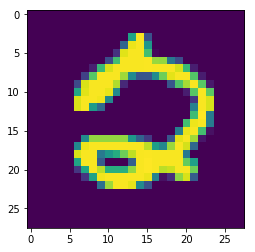

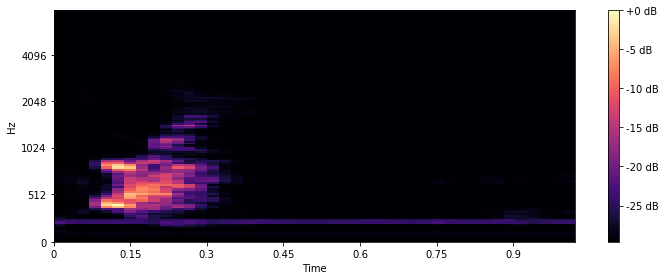

In [24]:

def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

def plotNormalizedSpectrogram(normalizedSpecto, aDigImg):
    plt.figure(figsize=(10, 4))
    spectrogramData = normalizedSpecto
    librosa.display.specshow(librosa.power_to_db(spectrogramData, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()
    
def displaySample(predict, dataSet, wrongPred):
    
    n = wrongPred[0]
    gn_predict = wrongPred[1]

    AC_predict = np.argmax(predict[n][0])
    IC_predict = np.argmax(predict[n][1])
    
    audio = np.reshape(dataSet[0][n], [128,44 ])
    image = dataSet[1][n]
    text = dataSet[2][n]
    real_label = dataSet[4][n]

    print("Showing sample number",n)
    print("Prediction - GN",gn_predict,"AC",AC_predict, "IC",IC_predict)
    
    print("Real label",real_label)
    digImg = gen_image(image)
    plotNormalizedSpectrogram(audio, digImg)

_, validationSet = loadData_TwoModal("0.9","0.9")
    
# GN Right - AC/IC wrong
#1262 GN 7 AC 0 IC 1
#1413 GN 7 AC 8 IC 3
#2241
#3008
#3012
#3087
#3457


correct_index = correct_samples[1413] 

# 1, 14, 17 where both AC/IC were incorrect
incorrect_index = incorrect_samples[0] # 0, 69 where AC and IC were correct while GN fucked up


displaySample(validationSet,Display_Validation_Data,incorrect_index)

# GN Wrong - AC/IC Correct
#displaySample(validationSet,Display_Validation_Data,incorrect_samples[0] )
#displaySample(validationSet,Display_Validation_Data,incorrect_samples[69] )


In [32]:
AC_wrong, IC_wrong, GN_wrong, GN_right = 0,0,0,0
c = 0
for i in range(len(incorrect_samples)):
    nsample = incorrect_samples[i][0] # index, 1 is gn prediction
    gn_predict = incorrect_samples[i][1] 
    
    correct_label = np.argmax(validationSet[nsample][2])
    AC_predict = np.argmax(validationSet[nsample][0])
    IC_predict = np.argmax(validationSet[nsample][1])
    if(AC_predict != correct_label and IC_predict != correct_label):
        c += 1 #print(nsample)
    else:
        if (AC_predict != correct_label):
            AC_wrong += 1
        if (IC_predict != correct_label):
            IC_wrong += 1
    
    if(AC_predict == correct_label and IC_predict == correct_label):
        GN_wrong += 1
        
for i in range(len(correct_samples)):
    nsample = correct_samples[i][0] # index, 1 is gn prediction
    gn_predict = correct_samples[i][1] 
    
    correct_label = np.argmax(validationSet[nsample][2])
    AC_predict = np.argmax(validationSet[nsample][0])
    IC_predict = np.argmax(validationSet[nsample][1])
    
    if(AC_predict != correct_label and IC_predict != correct_label):
        if(gn_predict == correct_label):
            GN_right += 1
        

print("No one correct",c, "(","{:2f}".format((c/len(incorrect_samples))*100),"of all incorrect samples)") 
print("GN had",GN_right,"when both AC/IC were incorrect but",GN_wrong,"wrong when AC/IC were correct")
print("AC had",AC_wrong, "wrong while IC had",IC_wrong,"wrong")


No one correct 26 ( 29.545455 of all incorrect samples)
GN had 7 when both AC/IC were incorrect but 0 wrong when AC/IC were correct
AC had 53 wrong while IC had 9 wrong
